In [2]:
!pip install yfinance

In [3]:
!pip install mplfinance

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
import pandas as pd

In [11]:
shell= yf.Ticker("SHEL")
shell.info

{'address1': 'Shell Centre',
 'city': 'London',
 'zip': 'SE1 7NA',
 'country': 'United Kingdom',
 'phone': '44 20 7934 1234',
 'website': 'https://www.shell.com',
 'industry': 'Oil & Gas Integrated',
 'industryDisp': 'Oil & Gas Integrated',
 'sector': 'Energy',
 'sectorDisp': 'Energy',
 'longBusinessSummary': 'Shell plc operates as an energy and petrochemical company Europe, Asia, Oceania, Africa, the United States, and Rest of the Americas. The company operates through Integrated Gas, Upstream, Marketing, Chemicals and Products, and Renewables and Energy Solutions segments. It explores for and extracts crude oil, natural gas, and natural gas liquids; markets and transports oil and gas; produces gas-to-liquids fuels and other products; and operates upstream and midstream infrastructure necessary to deliver gas to market. The company also markets and trades natural gas, liquefied natural gas (LNG), crude oil, electricity, carbon-emission rights; and markets and sells LNG as a fuel for h

In [23]:
shel_stocks= shell.history(period="14d")
shel_stocks

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-15 00:00:00-04:00,61.439999,61.529999,60.834999,60.930000,4170397,0.0,0.0
2023-08-16 00:00:00-04:00,60.700001,61.189999,60.650002,60.680000,5011595,0.0,0.0
2023-08-17 00:00:00-04:00,61.450001,61.680000,60.831001,60.990002,4099843,0.0,0.0
2023-08-18 00:00:00-04:00,60.389999,61.230000,60.265999,61.200001,3627689,0.0,0.0
2023-08-21 00:00:00-04:00,61.580002,61.709999,61.060001,61.419998,2906847,0.0,0.0
2023-08-22 00:00:00-04:00,61.470001,61.529999,60.880001,60.930000,2903838,0.0,0.0
2023-08-23 00:00:00-04:00,60.610001,60.970001,60.125000,60.730000,2818815,0.0,0.0
2023-08-24 00:00:00-04:00,60.470001,60.939999,60.419998,60.459999,2915432,0.0,0.0
2023-08-25 00:00:00-04:00,61.049999,61.160000,60.575001,61.029999,3417173,0.0,0.0


In [24]:
shel_stocks.to_csv('shel.csv')

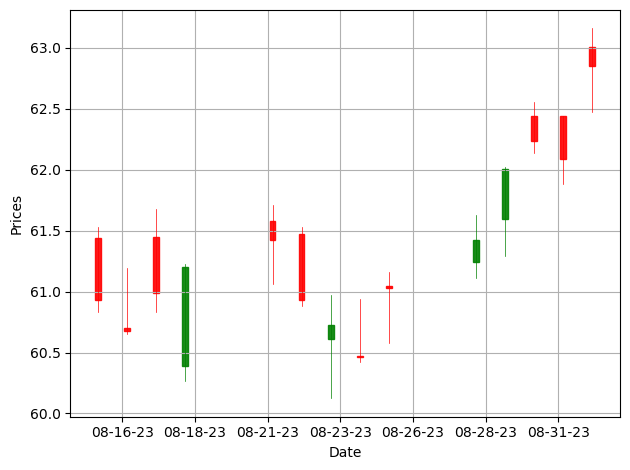

In [33]:
shel_stocks= pd.read_csv('shel.csv')
shel_stocks= shel_stocks[['Date', 'Open', 'High', 'Low', 'Close']]
shel_stocks['Date']= pd.to_datetime(shel_stocks['Date'])
shel_stocks['Date']= shel_stocks['Date'].map(mpdates.date2num)

fig, ax= plt.subplots()
candlestick_ohlc(ax, shel_stocks.values, colorup='green', colordown='red', alpha=0.9)
ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')

date_format= mpdates.DateFormatter('%m-%d-%y')
ax.xaxis.set_major_formatter(date_format)
fig.tight_layout()
plt.show()